# Alex Johny
**CMSC389A - Final Project**
Here I am doing the imports I need to run the notebook

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import io

Using TensorFlow backend.


## Importing The Data

In this section I am importing the NY Mortgage data from the csv downloaded off of Kaggle, the original csv was modified so that the output of whether a loan was given or not was recalculated to be either a 1 (loan accepted) or 0 for (loan denied) instead of the original output of 7 different categories of outcomes. I also removed all the features that contained strings, and a few other features that appeared to hurt the performance of the Model.

In [127]:
columns = [
    'agency_code',
    'applicant_ethnicity',
    'applicant_income_000s',
    'applicant_race_1',
    'applicant_sex',
    'co_applicant_ethnicity',
    'co_applicant_race_1',
    'co_applicant_sex',
    'county_code',
    'lien_status',
    'loan_purpose',
    'loan_type',
    'msamd',
    'owner_occupancy',
    'preapproval',
    'property_type',
    'purchaser_type',
    #'sequence_number',
    #'state_code',
    'hud_median_family_income',
    'loan_amount_000s',
    'number_of_1_to_4_family_units',
    'number_of_owner_occupied_units',
    'minority_population',  
    'population',
    'tract_to_msamd_income']


TRAIN_CSV = 'ny_hmda_2015_final2.csv'
df = pd.read_csv(TRAIN_CSV)

df = df.dropna(how='any') 

df.head(10)

,agency_code,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,co_applicant_ethnicity,co_applicant_race_1,co_applicant_sex,county_code,lien_status,...,property_type,purchaser_type,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income,action_taken
1,9,2,200.0,5,1,5,8,5,61.0,1,...,1,6,71300.0,460,53.0,256.0,45.959999,3512.0,160.600006,1
3,9,2,202.0,5,1,2,5,2,59.0,1,...,1,0,109000.0,770,1879.0,2147.0,7.350000,6642.0,165.830002,1
4,9,2,255.0,5,1,5,8,5,59.0,1,...,1,0,109000.0,648,835.0,676.0,30.059999,2339.0,133.300003,1
5,5,2,100.0,5,1,2,5,2,91.0,2,...,1,0,82700.0,40,3488.0,2002.0,6.130000,8977.0,110.220001,1
6,9,2,25.0,2,1,5,8,5,29.0,1,...,1,0,69000.0,57,1891.0,804.0,45.419998,4881.0,48.299999,1
7,9,2,13.0,3,2,5,8,5,29.0,1,...,1,0,69000.0,38,1686.0,519.0,97.900002,2757.0,42.660000,1
8,9,3,230.0,6,3,5,8,5,93.0,1,...,1,0,82700.0,159,2414.0,2077.0,14.770000,7442.0,138.440002,1
9,9,3,114.0,6,3,5,8,5,59.0,1,...,1,8,109000.0,302,363.0,1817.0,21.139999,5870.0,109.459999,1
10,7,2,89.0,5,1,2,5,2,81.0,1,...,1,3,71300.0,135,251.0,558.0,32.090000,1960.0,115.790001,1
11,7,2,60.0,5,1,5,8,5,65.0,1,...,1,9,63000.0,88,2759.0,2210.0,8.310000,7122.0,169.949997,1


## Building the model

Here is the DNN model that I used. I had an inital dense layer with 46 nodes (2 times the input dimension) and then I attempted to slowly shrink the dense layers down while going back and forth between ReLU and sigmoid activation. 

In [128]:
model = Sequential()
model.add(Dense(46, input_dim=23, activation='relu'))
model.add(Dense(23, activation='relu'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 46)                1104      
_________________________________________________________________
dense_82 (Dense)             (None, 23)                1081      
_________________________________________________________________
dense_83 (Dense)             (None, 12)                288       
_________________________________________________________________
dense_84 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_85 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 5         
Total params: 2,584
Trainable params: 2,584
Non-trainable params: 0
_________________________________________________________________


## Training the Model
Here only 80 percent of the data is being used to train and the remaining 20 percent will be used for testing. The data will also be shuffled because as the csv currently stands a bulk of the accepted loans are sitting unsorted in the top half of the dataset

In [129]:
frac = 0.80
kSEED = 7
np.random.seed(kSEED)

data = []
for row in df.itertuples():
    label = row[25]
    features = row[1:24]
    tup = (features, label)
    data.append(tup)

data = shuffle(data, random_state=kSEED)
split_index = int(frac * len(data))
train = data[:split_index]
test = data[split_index:]

X_train = np.array([x[0] for x in train]) #features
y_train = np.array([x[1] for x in train]) #label
X_test = np.array([x[0] for x in train])  #features
y_test = np.array([x[1] for x in train])  #label

In [130]:
len(y_test) - sum(y_test)

89221

## Testing the Model

In [133]:
# sgd = optimizers.SGD(lr=0.05, clipnorm=1.)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=12)
scores = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
276302/276302 [==============================] - 47s 172us/step - loss: 0.6292 - acc: 0.6771
Epoch 2/5
276302/276302 [==============================] - 46s 167us/step - loss: 0.6292 - acc: 0.6771
Epoch 3/5
276302/276302 [==============================] - 48s 172us/step - loss: 0.6291 - acc: 0.6771
Epoch 4/5
276302/276302 [==============================] - 46s 166us/step - loss: 0.6291 - acc: 0.6771
Epoch 5/5
276302/276302 [==============================] - 49s 177us/step - loss: 0.6291 - acc: 0.6771
Accuracy: 67.71%


## Analysis

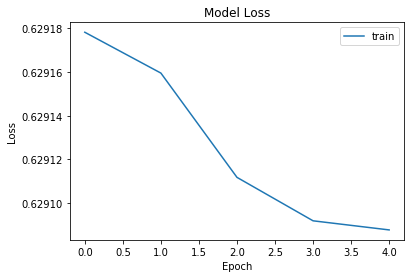

In [135]:
from matplotlib import pyplot

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

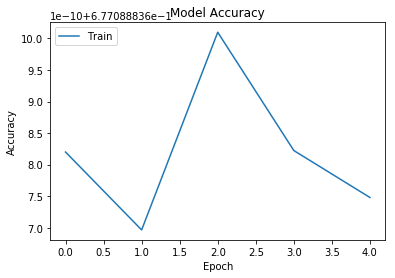

In [137]:
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()